In [1]:
from skimage.io import imread_collection, imshow
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imsave

#input images
folder = np.array(imread_collection(r"C:\Users\Sam Dieltiens\Desktop\LR1\tiling_images\iss\*.tif"), dtype=object)

In [2]:
#input target tile size
target_tile_height = 500
target_tile_width = 500

In [3]:
#calculate largest height and width
heights = []
widths = []
for i in range(len(folder)):
    heights.append(folder[i].shape[0])
    widths.append(folder[i].shape[1])

max_rows = sorted(heights, reverse = True)[0]
max_columns = sorted(widths, reverse = True)[0] 
print(max_rows,max_columns)

988 1337


In [4]:
#calculate the target number of tiles, both in height & width
ydiv = np.ceil(max_rows / target_tile_height)
xdiv = np.ceil(max_columns / target_tile_width)
print(ydiv,xdiv)

3.0 2.0


In [5]:
#calculate target image resolution, based on target tile size and imported image resolution
target_full_rows = ydiv * target_tile_height
target_full_columns = xdiv * target_tile_width
print(target_full_rows, target_full_columns)

1000.0 1500.0


In [6]:
#calculate difference between target image resolution and input image resolution
rowdiff = []
columndiff = []
for i in range(len(heights)):
    rowdiff.append(target_full_rows - heights[i])
    columndiff.append(target_full_columns - widths[i])
rowdiff = [int(i) for i in rowdiff]
columndiff = [int(i) for i in columndiff]
print(rowdiff, '\n' , columndiff)

[17, 19, 16, 12, 22, 21, 18, 28, 17, 19, 20, 22, 20, 12, 21, 29] 
 [168, 167, 167, 163, 167, 176, 169, 175, 168, 169, 166, 174, 164, 174, 174, 168]


In [7]:
#pad the images with zero pixels until target resolution
imgs = folder.copy()
for i in range(len(folder)):
    imgs[i] = np.pad(folder[i], ((0, rowdiff[i]), (0, columndiff[i])))

In [8]:
#check if the resolutions match the target resolution
for i in range(len(imgs)):
    if imgs[i].shape[0] != target_full_rows:
        print("Target rows doesn't match actual rows")
    elif imgs[i].shape[1] != target_full_columns:
        print("Target columns doesn't match actual columns")
    else:
        continue

In [9]:
#tile the images
intsplit = []
for i in range(len(imgs)):
    intsplit.append(np.split(imgs[i], ydiv, axis = 0))
intsplit = np.array(intsplit)
tiled_imgs = []
for i in range(len(intsplit)):
    tiled_imgs.append(np.split(intsplit[i], xdiv, axis = 2))
tiled_imgs = np.array(tiled_imgs)
print((np.shape(tiled_imgs)))

(16, 3, 2, 500, 500)


In [10]:
#save each tile with meaningful name
for i in range(len(tiled_imgs)):
    for j in range(int(xdiv)):
        for k in range(int(ydiv)):
            imsave("img{}tile{},{}.tiff".format(i, j, k), tiled_imgs[i][j][k])

C:\Users\Sam Dieltiens\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


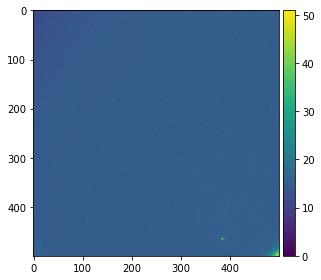

In [11]:
imshow(tiled_imgs[1][0][0])

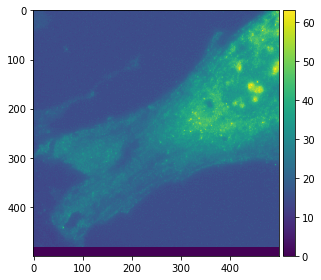

In [12]:
imshow(tiled_imgs[1][0][1])

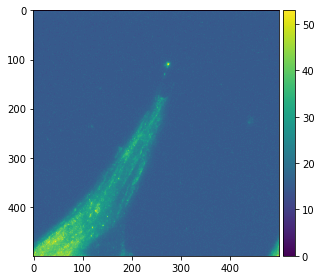

In [13]:
imshow(tiled_imgs[1][1][0])

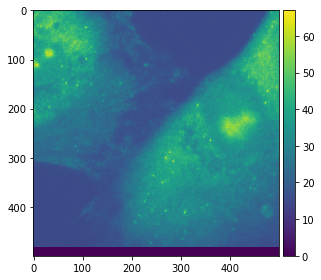

In [14]:
imshow(tiled_imgs[1][1][1])

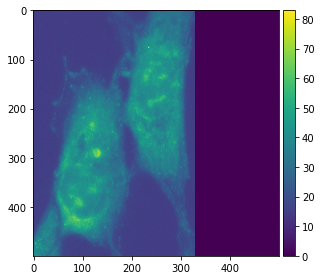

In [15]:
imshow(tiled_imgs[1][2][0])

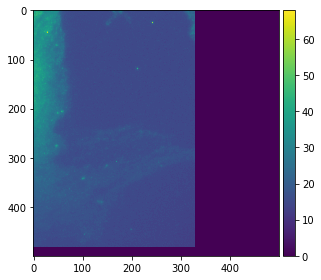

In [16]:
imshow(tiled_imgs[1][2][1])

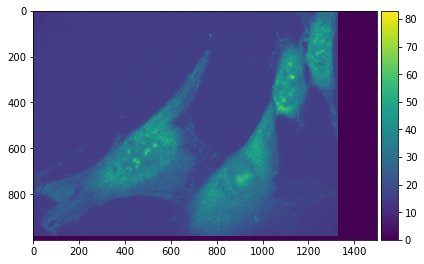

In [17]:
imshow(imgs[1])

In [21]:
#stitch images back together
intermediate1 = []
intermediate2 = []
stitched_imgs = np.array([])

for j in range(len(folder)):
    for i in range(int(xdiv)):
        intermediate1.append(np.vstack((tiled_imgs[j][i][0], tiled_imgs[j][i][1])))
    intermediate2  = np.hstack(([i for i in intermediate1]))
stitched_imgs = np.asarray(np.hsplit(intermediate2, len(imgs)))

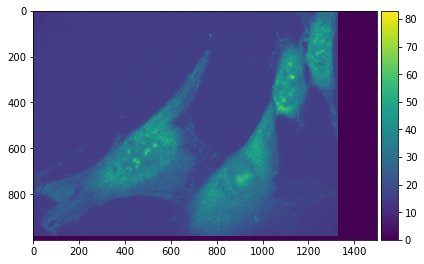

In [22]:
imshow(stitched_imgs[1])